# K-means clustering

The notebook aims to study and implement a k-means clustering using "sklearn". The iris dataset will be used to identify clusters automatically.


## Acknowledgments

- Used dataset: https://archive.ics.uci.edu/ml/datasets/iris

- Inquiries: mauricio.antelis@tec.mx


# Importing libraries

In [1]:
# Import the packages that we will be using
import pandas as pd                 # For data handling
import seaborn as sns               # For advanced plotting
import matplotlib.pyplot as plt     # For showing plots

# Note: specific functions of the "sklearn" package will be imported when needed to show concepts easily

# Importing data

In [2]:
# Define the col names for the iris dataset
colnames = ["Sepal_Length", "Sepal_Width","Petal_Length","Petal_Width", "Flower"]

# Dataset url
url = "datasets/iris/iris.csv"

# Load the dataset from the UCI machine learning repository
dataset = pd.read_csv(url, header = None, names = colnames )


# Undertanding and preprocessing the data

1. Get a general 'feel' of the data


In [3]:
print(dataset.shape)

dataset.head()

(150, 5)


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Flower
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


2. Drop rows with any missing values


In [4]:
dataset = dataset .dropna()

print(dataset.shape)

(150, 5)


3. Encoding the class label categorical column: from string to num


In [5]:
# Encoding the categorical column
dataset = dataset.replace({"Flower":  {"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2} })

#Visualize the dataset
dataset

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Flower
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


4. Discard columns that won't be used


In [6]:
# Drop out non necesary columns
dataset.drop(['Sepal_Length', 'Sepal_Width'],axis='columns',inplace=True)

#Visualize the dataset
dataset


,Petal_Length,Petal_Width,Flower
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
...,...,...,...
145,5.2,2.3,2
146,5.0,1.9,2
147,5.2,2.0,2
148,5.4,2.3,2


5. Scatter plot of the data

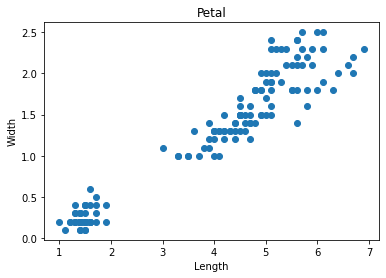

In [7]:
plt.scatter(dataset.Petal_Length,dataset.Petal_Width)
plt.title('Petal')
plt.xlabel('Length')
plt.ylabel('Width')
plt.show()

6. Scatter plot of the data asigning each point to the cluster it belongs to ¡¡

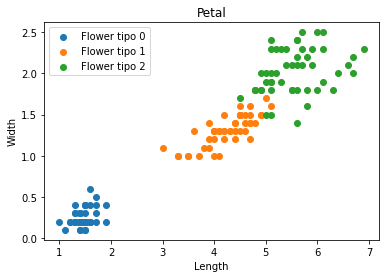

In [8]:
df1 = dataset[dataset.Flower==0]
df2 = dataset[dataset.Flower==1]
df3 = dataset[dataset.Flower==2]

plt.scatter(df1.Petal_Length, df1.Petal_Width, Label='Flower tipo 0')
plt.scatter(df2.Petal_Length, df2.Petal_Width, Label='Flower tipo 1')
plt.scatter(df3.Petal_Length, df3.Petal_Width, Label='Flower tipo 2')

plt.title('Petal')
plt.xlabel('Length')
plt.ylabel('Width')
plt.legend()
plt.show()

Recall that for this dataset we know in advance the class to which each point belongs to

# Kmeans clustering

Kmeans clustering

In [9]:
# Import sklearn KMeans
from sklearn.cluster import KMeans

# Define number of clusters
km = KMeans(n_clusters=3)

# Do K-means clustering (assing each point in the dataset to a cluster)
#yp = km.fit_predict(dataset)
yp = km.fit_predict(dataset[['Petal_Length','Petal_Width']])

# Print estimated cluster of each point in the dataser
yp

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [10]:
# Add a new column to the dataset with the cluster information
dataset['Cluster1'] = yp

dataset

,Petal_Length,Petal_Width,Flower,Cluster1
0,1.4,0.2,0,0
1,1.4,0.2,0,0
2,1.3,0.2,0,0
3,1.5,0.2,0,0
4,1.4,0.2,0,0
...,...,...,...,...
145,5.2,2.3,2,1
146,5.0,1.9,2,1
147,5.2,2.0,2,1
148,5.4,2.3,2,1


In [11]:
dataset.Cluster1.unique()

array([0, 2, 1])

In [12]:
# ...
km.cluster_centers_

array([[1.462     , 0.246     ],
       [5.59583333, 2.0375    ],
       [4.26923077, 1.34230769]])

In [13]:
# ...
km.inertia_

31.371358974358966

<span style='color:Blue'> **Important remarks**  </span>

- The number of each cluster is randomly assigned
- The order of the numer in each cluster is random

# Plot estimated clusters

Plot estimated clusters

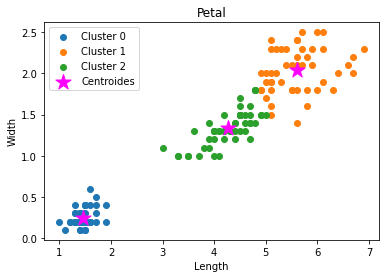

In [14]:
df1 = dataset[dataset.Cluster1==0]
df2 = dataset[dataset.Cluster1==1]
df3 = dataset[dataset.Cluster1==2]

plt.scatter(df1.Petal_Length, df1.Petal_Width, Label='Cluster 0')
plt.scatter(df2.Petal_Length, df2.Petal_Width, Label='Cluster 1')
plt.scatter(df3.Petal_Length, df3.Petal_Width, Label='Cluster 2')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='magenta', marker='*', label='Centroides', s=256)

plt.title('Petal')
plt.xlabel('Length')
plt.ylabel('Width')
plt.legend()
plt.show()

# Selecting K: elbow plot

Check the acurracy of the model using k-fold cross-validation

In [15]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit_predict(dataset[['Petal_Length','Petal_Width']])
    sse.append(km.inertia_)

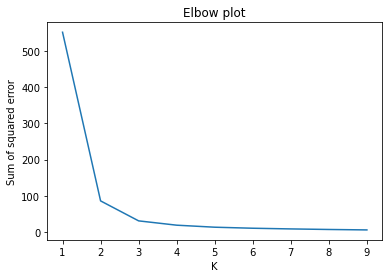

In [16]:
plt.plot(k_rng,sse)

plt.title('Elbow plot')
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.show()

<span style='color:Blue'> **Important remarks**  </span>

- Note that for K=2 ...
- Note that for K=3 ...



# Normalizing the data: preprocessing using min max scaler

Normalizing the data: preprocessing using min max scaler

In [17]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(dataset[['Petal_Length']])
dataset['Petal_Length'] = scaler.transform(dataset[['Petal_Length']])

scaler.fit(dataset[['Petal_Width']])
dataset['Petal_Width'] = scaler.transform(dataset[['Petal_Width']])

dataset

,Petal_Length,Petal_Width,Flower,Cluster1
0,0.067797,0.041667,0,0
1,0.067797,0.041667,0,0
2,0.050847,0.041667,0,0
3,0.084746,0.041667,0,0
4,0.067797,0.041667,0,0
...,...,...,...,...
145,0.711864,0.916667,2,1
146,0.677966,0.750000,2,1
147,0.711864,0.791667,2,1
148,0.745763,0.916667,2,1


In [18]:
dataset.describe()

,Petal_Length,Petal_Width,Flower,Cluster1
count,150.000000,150.000000,150.000000,150.000000
mean,0.467458,0.458056,1.000000,1.013333
std,0.299203,0.317599,0.819232,0.827276
min,0.000000,0.000000,0.000000,0.000000
25%,0.101695,0.083333,0.000000,0.000000
50%,0.567797,0.500000,1.000000,1.000000
75%,0.694915,0.708333,2.000000,2.000000
max,1.000000,1.000000,2.000000,2.000000


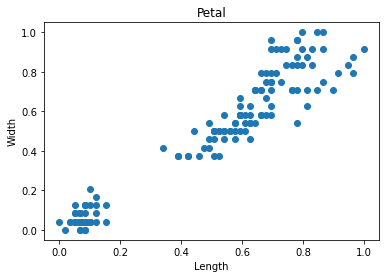

In [19]:
plt.scatter(dataset.Petal_Length,dataset.Petal_Width)
plt.title('Petal')
plt.xlabel('Length')
plt.ylabel('Width')
plt.show()

In [20]:
# Initialize model and define number of clusters
km = KMeans(n_clusters=3)

# Do K-means clustering (assing each point in the dataset to a cluster)
#yp = km.fit_predict(dataset)
yp = km.fit_predict(dataset[['Petal_Length','Petal_Width']])

# Print estimated cluster of each point in the dataser
yp

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [21]:
# Add a new column to the dataset with the cluster information
dataset['Cluster2'] = yp

dataset

,Petal_Length,Petal_Width,Flower,Cluster1,Cluster2
0,0.067797,0.041667,0,0,1
1,0.067797,0.041667,0,0,1
2,0.050847,0.041667,0,0,1
3,0.084746,0.041667,0,0,1
4,0.067797,0.041667,0,0,1
...,...,...,...,...,...
145,0.711864,0.916667,2,1,0
146,0.677966,0.750000,2,1,0
147,0.711864,0.791667,2,1,0
148,0.745763,0.916667,2,1,0


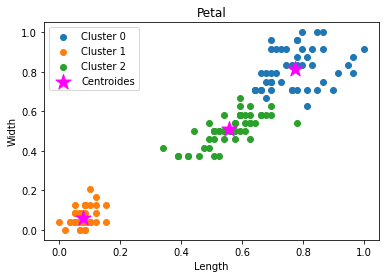

In [22]:
df1 = dataset[dataset.Cluster2==0]
df2 = dataset[dataset.Cluster2==1]
df3 = dataset[dataset.Cluster2==2]

plt.scatter(df1.Petal_Length, df1.Petal_Width, Label='Cluster 0')
plt.scatter(df2.Petal_Length, df2.Petal_Width, Label='Cluster 1')
plt.scatter(df3.Petal_Length, df3.Petal_Width, Label='Cluster 2')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='magenta', marker='*', label='Centroides', s=256)

plt.title('Petal')
plt.xlabel('Length')
plt.ylabel('Width')
plt.legend()
plt.show()